In [12]:
import numpy as np
from numpy import linalg as LA
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1 1)

In [20]:
img_ori = cv2.imread('input_img/book1.JPG')
img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img = cv2.imread('input_img/book1.JPG', 0)
kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

kernel_g = np.array([[1,2,1],[2,4,2],[1,2,1]])

# zero padding
img_padding = np.zeros((img.shape[0]+2, img.shape[1]+2), "uint8")
for i in xrange(img.shape[0]):
    for j in xrange(img.shape[1]):
        img_padding[i+1, j+1] = img[i, j]
print "zero padding finished"

# box blur
blur_padding = np.zeros((img.shape[0]+2, img.shape[1]+2), "uint8")
for i in xrange(img.shape[0]):
    for j in xrange(img.shape[1]):
        blur_padding[i+1, j+1] = np.sum(img_padding[i:i+3, j:j+3])/9
print "box blur finished"

# x, y derivatives
img_deriv_x = np.zeros((img.shape[0]+2, img.shape[1]+2))
img_deriv_y = np.zeros((img.shape[0]+2, img.shape[1]+2))
for i in xrange(img.shape[0]):
    for j in xrange(img.shape[1]):
        img_deriv_x[i+1, j+1] = np.sum(kernel_x * blur_padding[i:i+3, j:j+3])
        img_deriv_y[i+1, j+1] = np.sum(kernel_y * blur_padding[i:i+3, j:j+3])
print "derivatives finished"

# calc Ixx, Iyy, Ixy
Ixx = img_deriv_x**2
Iyy = img_deriv_y**2
Ixy = img_deriv_x*img_deriv_y
print "Ixx Iyy Ixy finished"

# gaussian blur
Ixx_g = np.zeros((img.shape[0], img.shape[1]))
Iyy_g = np.zeros((img.shape[0], img.shape[1]))
Ixy_g = np.zeros((img.shape[0], img.shape[1]))
for i in xrange(img.shape[0]):
    for j in xrange(img.shape[1]):
        Ixx_g[i, j] = np.sum(kernel_g * Ixx[i:i+3, j:j+3])/16
        Iyy_g[i, j] = np.sum(kernel_g * Iyy[i:i+3, j:j+3])/16
        Ixy_g[i, j] = np.sum(kernel_g * Ixy[i:i+3, j:j+3])/16
print "gaussian blur finished"
        
# harris detection
harris = np.zeros((img.shape[0], img.shape[1]))

# for i in xrange(img.shape[0]):
#     for j in xrange(img.shape[1]):
#         harris[i, j] = Ixx_g[i,j]*Iyy_g[i,j] - Ixy_g[i,j]**2 - 0.9*(Ixx_g[i,j]+Iyy_g[i,j])**2
        
harris = Ixx_g*Iyy_g - Ixy_g**2 - 0.06*(Ixx_g+Iyy_g)**2
g_max = np.max(harris)
harris = cv2.normalize(  harris,        # src
                            None,             # dst
                            0,                # alpha
                            255,              # beta
                            cv2.NORM_MINMAX,  # norm type
                            cv2.CV_32FC1,     # dtype
                            None              # mask
                            )
print "normalize finished"
g_max = np.max(harris)



zero padding finished
box blur finished
derivatives finished
Ixx Iyy Ixy finished
gaussian blur finished
normalize finished


filtering
ploting image


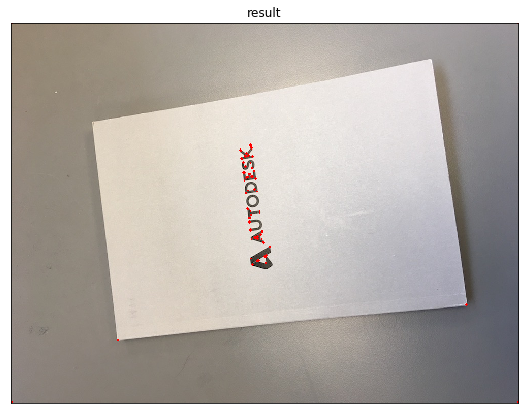

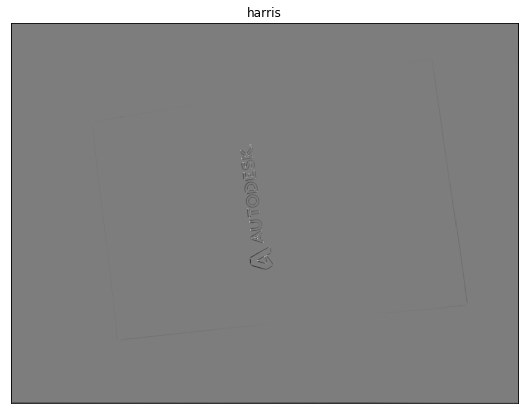

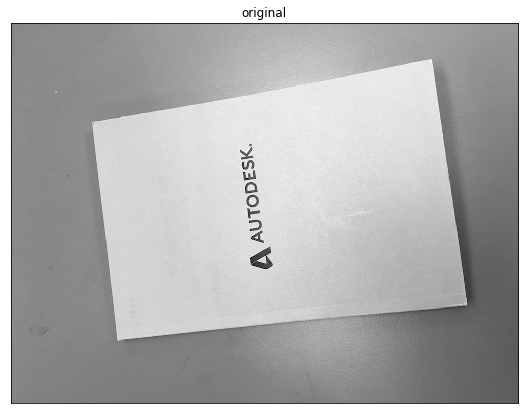

In [21]:
print "filtering"
harris_threah = np.zeros((img.shape[0]+2, img.shape[1]+2))

for i in xrange(harris.shape[0]):
    for j in xrange(harris.shape[1]):
        if (harris[i, j] > 0.5*g_max):
            harris_threah[i+1, j+1] = harris[i, j]
        else:
            harris_threah[i+1, j+1] = 0
            
for i in xrange(harris_threah.shape[0]):
    for j in xrange(harris_threah.shape[1]):
        if (harris_threah[i, j] > 0):
            index = np.argmax(harris_threah[i-1:i+2, j-1:j+2])
            index_i = index/3
            index_j = index%3
#             img_ori[i-2+index_i, j-2+index_j] = [255, 0, 0]
            cv2.circle(img_ori, ( j-2+index_j,i-2+index_i), 2,  (255,0,0), -1) 

        
# show images
print "ploting image"
plt.figure(figsize=(10,7))
plt.imshow(img_ori), plt.title('result')
plt.xticks([]), plt.yticks([])
plt.savefig('output_img/q1a_output.jpg')
plt.show()

plt.figure(figsize=(10,7))
plt.imshow(harris, cmap='gray'), plt.title('harris')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10,7))
plt.imshow(img, cmap='gray'), plt.title('original')
plt.xticks([]), plt.yticks([])
plt.show()

# Question 1 2)

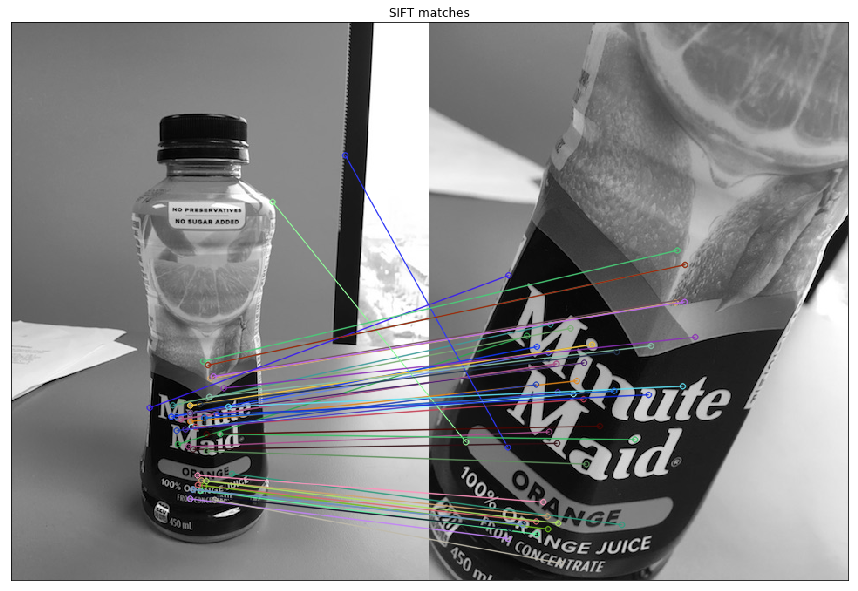

In [15]:
img1 = cv2.imread('input_img/bottle1.JPG',0) 
img2 = cv2.imread('input_img/bottle2.JPG',0)

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher( crossCheck=True)
matches = bf.match(des1,des2)
        
# Apply ratio test
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches1to2=matches[:50], outImg=None, flags=2)

plt.figure(figsize=(15,20))
plt.imshow(img3), plt.title('SIFT matches')
plt.xticks([]), plt.yticks([])
plt.savefig('output_img/q1b_output.jpg')
plt.show()


# Question 2

Analyzing images ... 


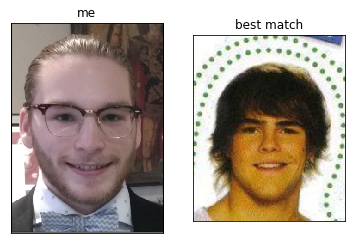

In [40]:
import os
import sys

# for perpormance reason, can set total_img_size to 100

total_img_size = 20000
current_img_index = 0

# def compare_hist(hist1, hist2):
#     difference = 0
#     for i in xrange(hist1.shape[0]):
#         for j in xrange(hist1.shape[1]):
#            difference += np.sum((hist1[i][j] - hist2[i][j])**2)
#     return difference

def compare_hist(hist1, hist2):
    difference = 0
    for i in xrange(hist1.shape[0]):
        for j in xrange(hist1.shape[1]):
            min_diff = np.sum((hist1[i][j] - hist2[i][j])**2)
            for x in xrange(hist2.shape[0]):
                for y in xrange(hist2.shape[1]):
                    temp = np.sum((hist1[i][j] - hist2[x][y])**2)
                    if temp < min_diff:
                        min_diff = temp
            difference += min_diff

    return difference
    
def normalize_hist(hist):
    index = 0
    while (hist[index] == 0):
        index += 1
    hist_min = index
    
    index = 255
    while (hist[index] == 0):
        index -= 1
    hist_max = index
    
    norm_hist = np.zeros(256)
    diff = hist_max - hist_min
    if diff == 0:
        return hist
    factor = float(255)/diff
    for i in xrange(hist_min, hist_max+1):
        if hist[i] != 0:
            new_index = int((i-hist_min)*factor)
            norm_hist[new_index] = hist[i]
    return norm_hist
    
        
def compute_window_feature(window):
    order = [3,6,7,8,5,2,1,0]
    window_f = window.flatten()
    bits = ''
    base = window_f[4]
    for number in order:
        bit = '1' if window_f[number]>= base else '0'
        bits += bit
    return int(bits, 2)
    
def compute_cell_feature(cell):
    cell_features = np.zeros(256)    
    cell_padding = np.zeros([cell.shape[0]+2, cell.shape[1]+2])
    for i in xrange(cell.shape[0]):
        for j in xrange(cell.shape[1]):
            cell_padding[i+1, j+1] = cell[i, j]
    
    for i in xrange(cell.shape[0]):
        for j in xrange(cell.shape[1]):
            window_feature = compute_window_feature(cell_padding[i:i+3, j:j+3])
            cell_features[window_feature] += 1

    return normalize_hist(cell_features)

def compute_feature(img):
    features = np.zeros([7, 7, 256])
    for i in xrange(0, 128, 21):
        for j in xrange(0, 126, 18):
            cell_feature = compute_cell_feature(img[i:i+21, j:j+18])
            for k in xrange(len(cell_feature)):
                features[i/21][j/18][k] += cell_feature[k]
    return features

img = cv2.imread('input_img/ta.png', 0)
# img = cv2.imread('ta.png', 0)
resized_img = cv2.resize(img, (128,128))
base_img = compute_feature(resized_img)
filenames = []

min_distance = sys.maxint
min_filename = ''

for filename in os.listdir(os.getcwd()+'/img_align_celeba'):
    filenames.append(filename)

print "Analyzing images ... "
for filename in filenames[:total_img_size]:
    current_img_index += 1
    img2 = cv2.imread('img_align_celeba/'+filename, 0)
    if current_img_index % 1000 == 0:
        sys.stdout.write('%d/%d\r' % (current_img_index, total_img_size))
        sys.stdout.flush()
    resized_img2 = cv2.resize(img2, (128,128))
    base_img2 = compute_feature(resized_img2)

    diff = compare_hist(base_img, base_img2)
    if diff < min_distance:
        min_distance = diff
        min_filename = filename
        
img_result = cv2.imread('img_align_celeba/'+min_filename)

img = cv2.imread('input_img/ta.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img), plt.title('me')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_result), plt.title('best match')
plt.xticks([]), plt.yticks([])
plt.savefig('output_img/q2output.jpg')
plt.show()